<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Another_model_0619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


# Using the Kaggle API

For a more complete list of what you can do with the API, visit https://github.com/Kaggle/kaggle-api.

## Listing competitions

In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         41           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        131           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        676           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        134           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1551           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14101           False  
house-pr

## Downloading a dataset

In [4]:
!kaggle datasets download "kartik2112/fraud-detection"

 98% 197M/202M [00:01<00:00, 112MB/s]
100% 202M/202M [00:01<00:00, 132MB/s]


In [5]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [6]:
import pandas as pd 

train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [7]:
#Concatenate the splitted data
df = pd.concat([train,test],ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
#Shape of the data (rows,columns)
df.shape

(1852394, 22)

In [10]:
#Finding dtypes and other basic info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt###
                               ### Visualisation tools
import seaborn as sns          ###

from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [12]:
#dividing data into categorical and numerical
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
le = LabelEncoder()

In [13]:
df['gender_le']  = le.fit_transform(df['gender'])

In [14]:
# Seperating  numerical from nominal
# cutting off some data to avoid heavy cpu usage
df2 = df.select_dtypes(exclude = 'object')
#df2 = df2.loc[:149999]

In [15]:
# dropping the feature which is not useful for data analysis
df2 = df2.drop(['cc_num'],axis=1)
# seperating target and independent features
x = df2.drop('is_fraud',axis=1)
y = df2['is_fraud']

In [16]:
df_num = df_num.drop(['cc_num'],axis=1)
df_num = df_num.drop('is_fraud',axis=1)

In [17]:
df_num.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [18]:
x.shape

(1852394, 9)

In [19]:
train_x = x[0:300000]
train_y = y[0:300000]


In [20]:
train_x

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_le
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,1
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,1
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,1
...,...,...,...,...,...,...,...,...,...
299995,96.03,25106,38.8265,-82.1364,642,1338048681,39.298162,-82.030474,0
299996,59.77,63021,38.5770,-90.5255,92608,1338048685,39.339959,-89.859340,1
299997,77.82,73754,36.3850,-98.0727,1078,1338048717,36.545200,-98.854027,1
299998,53.20,27522,36.1124,-78.6476,12335,1338048723,36.078714,-78.024839,0


In [21]:
# Scaling the data
ss = StandardScaler()
train_x[df_num.columns] = ss.fit_transform(train_x[df_num.columns])


In [22]:
train_y.value_counts()

0    297745
1      2255
Name: is_fraud, dtype: int64

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import random

In [24]:

epochs = 500

model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

opt = optimizers.Adam(learning_rate=0.000001)
model_c.compile(optimizer=opt,
            loss='binary_crossentropy',
            metrics=['acc'])
print(model_c.summary())
#hist = model_c.fit(dx, metric_c[:,0], validation_split=0.2, batch_size=400, epochs=epochs,shuffle=False,verbose=0,callbacks=[early_stop,VerboseCallback(epochs)]) #, callbacks=[es_callback])
hist = model_c.fit(train_x, train_y, validation_split=0.2, 
                   batch_size=5000, epochs=epochs,shuffle=False,use_multiprocessing=False,
                   verbose=1, callbacks=[early_stop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
48/48 [==============================] - 4s 7ms/step - loss: 0.6143 - acc: 0.8928 - val_loss: 0.5982 - val_acc: 0.8967
Epoch 2/500
48/48 [==============================] - 0s 4ms/step - loss: 0.6125 - acc: 0.8976 - val_loss: 0.5962 - val_acc: 0.9005
Epoch 3/500
48/48 [==============================] 

In [34]:
#Naive Bayes model
nb =GaussianNB()
model_c = nb.fit(train_x, train_y)

In [40]:
test_x = x[300000:310000]
test_y = y[300000:310000]
test_x[df_num.columns] = ss.fit_transform(test_x[df_num.columns])

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

pedict_y = model_c.predict(test_x)
#ppy = [1 if py > 0.5 else 0 for py in pedict_y[:,0]]     
ppy = [1 if py > 0.5 else 0 for py in pedict_y]              
acc = precision_recall_fscore_support(test_y.values,np.asarray(ppy),average='binary')

acc

(0.15873015873015872, 0.5128205128205128, 0.2424242424242424, None)

In [42]:
print(classification_report(test_y,ppy))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9961
           1       0.16      0.51      0.24        39

    accuracy                           0.99     10000
   macro avg       0.58      0.75      0.62     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
import math
f1s = []
batch_size = 20000
batch = math.ceil(x[300000:-1].shape[0]/batch_size)
for i in range(batch):
    ux = x[300000:-1][i*batch_size:(i+1)*batch_size]
    uy = y[300000:-1][i*batch_size:(i+1)*batch_size]
    predict_y = model_c.predict(ux)
    ppy = [1 if py > 0.5 else 0 for py in predict_y]       
    f1 = precision_recall_fscore_support(uy, np.asarray(ppy),average='binary')
    print("f1:",f1[2])
    f1s.append(f1[2])

f1: 0.004589444278160232
f1: 0.006876276844885147
f1: 0.009058782539445523
f1: 0.00846402788150361
f1: 0.010741993236522777
f1: 0.007769698177109274
f1: 0.008761449621664676
f1: 0.003693167639866248
f1: 0.0114342530449913
f1: 0.006876276844885147
f1: 0.006379585326953748
f1: 0.009256955158512914
f1: 0.007372720932549566
f1: 0.01212603120962131
f1: 0.012323593718942556
f1: 0.012323593718942556
f1: 0.012521116963132267
f1: 0.011335388286765438
f1: 0.014592743336476895
f1: 0.014789815871755423
f1: 0.012422360248447204
f1: 0.007571229328551504
f1: 0.009256955158512914
f1: 0.013113451221935229
f1: 0.00856317833316738
f1: 0.008166517279155463
f1: 0.008860570461446561
f1: 0.004589444278160232
f1: 0.008166517279155463
f1: 0.010049251281030794
f1: 0.008662318912729625
f1: 0.013804061770693678
f1: 0.014297061159650515
f1: 0.013508144616607072
f1: 0.010445162894802289
f1: 0.014395631670389675
f1: 0.012521116963132267
f1: 0.014297061159650515
f1: 0.0162666137671097
f1: 0.007769698177109274
f1: 0.0

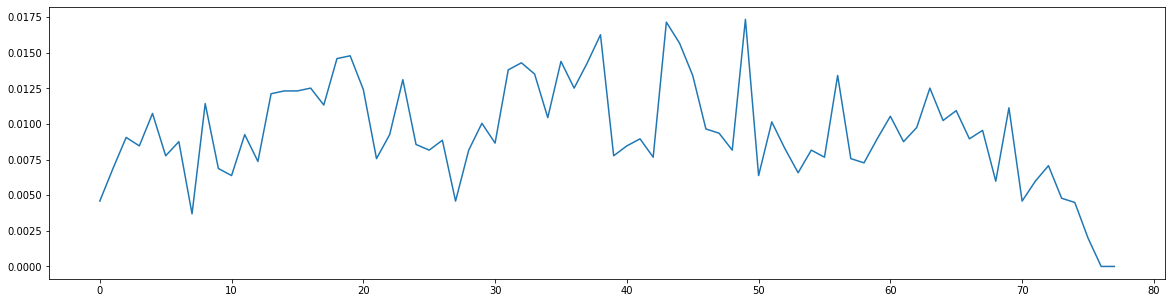

In [54]:
plt.figure(figsize=(20,5))
plt.plot(f1s)